# **Importing Libraries**

In [4]:
import pandas as pd #preprocessing and dealing with CSVs and data and for reading data etc
import numpy as np
import matplotlib.pyplot as plt #for plots (like the pie plot we used)
import seaborn as sns
import kagglehub # for uploading the dataset from kaggle
from sklearn.preprocessing import LabelEncoder # is for trasnforming categorical data into numbers that the algorithms can understand
from sklearn.model_selection import train_test_split # for splitting the data (df) to training and testing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # for scaling the data within a specefic range so no bias happens when training to bigger feature values
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import os # to see what is inside folders

# **Uploading Dataset**

In [2]:
#from kaggle
path = kagglehub.dataset_download("shashwatwork/web-page-phishing-detection-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.01M/1.01M [00:00<00:00, 79.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shashwatwork/web-page-phishing-detection-dataset/versions/2


In [5]:
import os
files_in_dir = os.listdir(path)
print("Files in dataset directory:", files_in_dir)

Files in dataset directory: ['dataset_phishing.csv']


In [8]:
df=pd.read_csv(path+'/dataset_phishing.csv') #we saved the data in df
df.head() #.head gives the first 5 rows of the data

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


# **Checking Dataset**

In [9]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
#shape of the dataset
df.shape # how many rows and columns(features)c in the dataset

(11430, 89)

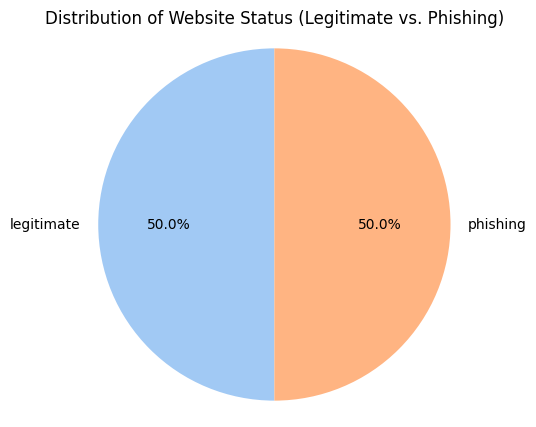

In [ ]:
#status is the target (y)
#check dist using a pieplot
#we can see the target is balanced

status_counts = df['status'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Website Status (Legitimate vs. Phishing)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
#check the datatypes of the columns
#we can see that all is numerical but URL and the target
#for the URL it will be removed
#for the target we will use binary encoding
df.info()

In [15]:
#check for null values
#we can see we have no missing (null) values
df.isnull().sum().sum()

np.int64(0)

In [ ]:
#check for 0 variance columns --> no meaningful patterns to learn
zero_variance_columns = df.columns[df.nunique() == 1] #nunique --> number of unique values in this column
print("Columns with 0 variance:", zero_variance_columns)

Columns with 0 variance: Index(['nb_or', 'ratio_nullHyperlinks', 'ratio_intRedirection',
       'ratio_intErrors', 'submit_email', 'sfh'],
      dtype='object')


In [ ]:
#remove them
df.drop(zero_variance_columns, axis=1, inplace=True) #axis=1 refers to deleting columns

In [ ]:
#check shape after
#we can see that 6 columns were removed
df.shape

(11430, 83)

# **Data Encoding**

In [17]:
#save URLs for later
urls = df['url']

In [18]:
#remove the URL column
df.drop('url', axis=1, inplace=True)

In [19]:
#encode the target
#legitimate is 0 and phishing is 1
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])
df['status'].head()

,status
0,0
1,1
2,1
3,0
4,0


In [ ]:
df.info()

# **ML**

## Call for Action

Comparing the models, the Random Forest Classifier demonstrated the strongest performance with the highest accuracy (0.9676), precision (0.9748), recall (0.9593), and F1-score (0.9670) on the test data. The Logistic Regression model also performed well (accuracy 0.9558), while the Decision Tree had the lowest test performance (accuracy 0.9361) and showed signs of overfitting on the training data.

## **Data Splitting**

In [21]:
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [ ]:
#split the data to X and Y
X = df.drop('status', axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random state guarantees that the same rows show each time for traininng and testing splits

In [ ]:
#check the shapes of each
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (9144, 81)
Shape of X_test: (2286, 81)
Shape of y_train: (9144,)
Shape of y_test: (2286,)


##**Feature Scaling**

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Logistic Regression**

In [ ]:
lr= LogisticRegression() # for binary classification either phishing or legitimate
lr.fit(X_train_scaled, y_train) # fit = train --> it is like training for a math exam

LogisticRegression()

In [ ]:
#traning data results
y_pred_train = lr.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print("Training Data Results:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

Training Data Results:
Accuracy: 0.946084864391951
Precision: 0.948302300109529
Recall: 0.9439598778892281
F1 Score: 0.946126106436455


In [ ]:
#testing data results
y_pred_test = lr.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Testing Data Results:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")

#overfitting is when we do good on training and much worse on testing it means that we memorized the training examples

Testing Data Results:
Accuracy: 0.9558180227471567
Precision: 0.9589285714285715
Recall: 0.9512843224092117
F1 Score: 0.9550911516229436


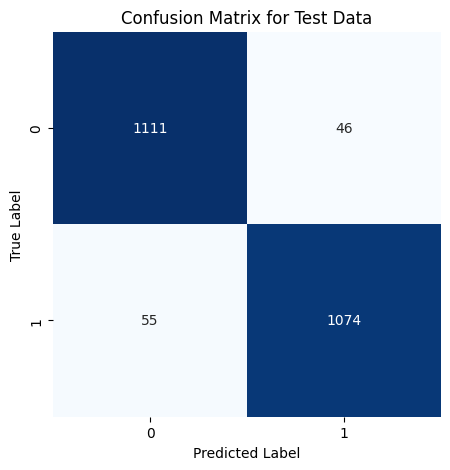

In [ ]:
#plot confusion matrix
confusion_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print("Classification Report for Logistic Regression Test Data:")
print(classification_report(y_test, y_pred_test))

Classification Report for Logistic Regression Test Data:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1157
           1       0.96      0.95      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



## **Decision Tree**


In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_train_dt = dt_classifier.predict(X_train_scaled)

accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
precision_train_dt = precision_score(y_train, y_pred_train_dt)
recall_train_dt = recall_score(y_train, y_pred_train_dt)
f1_train_dt = f1_score(y_train, y_pred_train_dt)

print("Decision Tree Training Data Results:")
print(f"Accuracy: {accuracy_train_dt}")
print(f"Precision: {precision_train_dt}")
print(f"Recall: {recall_train_dt}")
print(f"F1 Score: {f1_train_dt}")

Decision Tree Training Data Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
y_pred_test_dt = dt_classifier.predict(X_test_scaled)

accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
precision_test_dt = precision_score(y_test, y_pred_test_dt)
recall_test_dt = recall_score(y_test, y_pred_test_dt)
f1_test_dt = f1_score(y_test, y_pred_test_dt)

print("Decision Tree Testing Data Results:")
print(f"Accuracy: {accuracy_test_dt}")
print(f"Precision: {precision_test_dt}")
print(f"Recall: {recall_test_dt}")
print(f"F1 Score: {f1_test_dt}")

Decision Tree Testing Data Results:
Accuracy: 0.9361329833770778
Precision: 0.9322779243623571
Recall: 0.9388839681133747
F1 Score: 0.9355692850838482


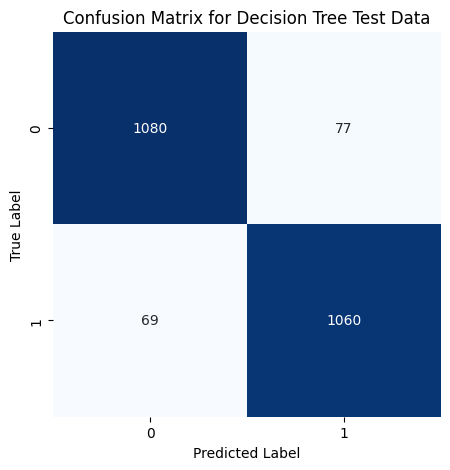

In [ ]:
confusion_test_dt = confusion_matrix(y_test, y_pred_test_dt)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_test_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report for Decision Tree Test Data:")
print(classification_report(y_test, y_pred_test_dt))

Classification Report for Decision Tree Test Data:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1157
           1       0.93      0.94      0.94      1129

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



## **Random Forest**


In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_train_rf = rf_classifier.predict(X_train_scaled)

accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
precision_train_rf = precision_score(y_train, y_pred_train_rf)
recall_train_rf = recall_score(y_train, y_pred_train_rf)
f1_train_rf = f1_score(y_train, y_pred_train_rf)

print("Random Forest Training Data Results:")
print(f"Accuracy: {accuracy_train_rf}")
print(f"Precision: {precision_train_rf}")
print(f"Recall: {recall_train_rf}")
print(f"F1 Score: {f1_train_rf}")

Random Forest Training Data Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
y_pred_test_rf = rf_classifier.predict(X_test_scaled)

accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
precision_test_rf = precision_score(y_test, y_pred_test_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)

print("Random Forest Testing Data Results:")
print(f"Accuracy: {accuracy_test_rf}")
print(f"Precision: {precision_test_rf}")
print(f"Recall: {recall_test_rf}")
print(f"F1 Score: {f1_test_rf}")

Random Forest Testing Data Results:
Accuracy: 0.9676290463692039
Precision: 0.9747974797479748
Recall: 0.9592559787422498
F1 Score: 0.9669642857142857


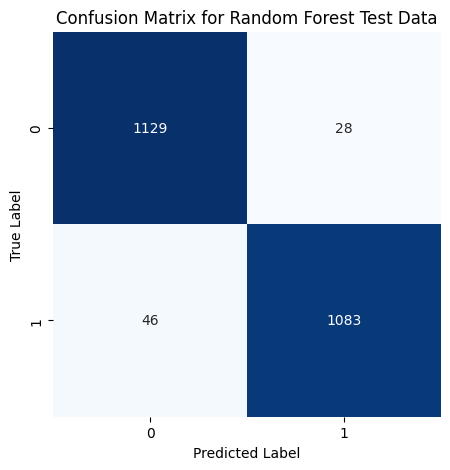

In [ ]:
confusion_test_rf = confusion_matrix(y_test, y_pred_test_rf)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_test_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report for Random Forest Test Data:")
print(classification_report(y_test, y_pred_test_rf))

Classification Report for Random Forest Test Data:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1157
           1       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286

